In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph
import math
from IPython.display import Image, display

# Make a flow that returns the square of a number, then the factorial for that squared number

input = x

- step 1: y = x^2
- step 2: z = y!
  
the return type of the ouput is an integer

In [3]:
## Define class for AgentState (state of the entire flow)

class AgentState(TypedDict):
    num: int

In [4]:
## create first node for square
def square(state: AgentState) -> AgentState:
    state['num'] = state['num'] ** 2
    return state

## create second node for factorial
def factorial(state: AgentState) -> AgentState:
    state['num'] = math.factorial(state['num'])
    return state

In [5]:
graph = StateGraph(AgentState)
graph.add_node("squaring", square)
graph.add_node("factoring", factorial)

graph.add_edge("squaring", "factoring")

In [6]:
graph.set_entry_point("squaring")
graph.set_finish_point("factoring")

app = graph.compile()

In [9]:
result = app.invoke({"num": int(input())})
result["num"]

24

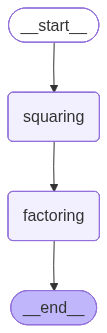

In [8]:
display(Image(app.get_graph().draw_mermaid_png()))